Salary Project Problem Statement: Problem Statement Predict the salary if the employee using the features provided in the data.

In [1]:
#useful libraries 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#loading dataset
salary_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
salary_data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
salary_data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [4]:
salary_data.count()

rank             397
discipline       397
yrs.since.phd    397
yrs.service      397
sex              397
salary           397
dtype: int64

In [5]:
salary_data.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
salary_data.value_counts()

rank      discipline  yrs.since.phd  yrs.service  sex     salary
AsstProf  B           4              4            Male    92000     3
                      3              3            Male    89942     2
                      4              4            Male    92700     2
Prof      B           12             8            Male    118223    1
                      15             10           Male    107986    1
                                                                   ..
          A           13             7            Male    103700    1
                      12             7            Male    109707    1
                                     6            Male    93000     1
                                     0            Female  105000    1
          B           56             49           Male    186960    1
Length: 393, dtype: int64

In [7]:
salary_data=salary_data.drop('sex',axis=1) # we can drop sex column

In [8]:
#converting object type to number by using encoder
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
salary_data['rank']=lab.fit_transform(salary_data['rank'])

salary_data

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,B,19,18,139750
1,2,B,20,16,173200
2,1,B,4,3,79750
3,2,B,45,39,115000
4,2,B,40,41,141500
...,...,...,...,...,...
392,2,A,33,30,103106
393,2,A,31,19,150564
394,2,A,42,25,101738
395,2,A,25,15,95329


In [9]:
salary_data['discipline']=lab.fit_transform(salary_data['discipline'])
salary_data

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


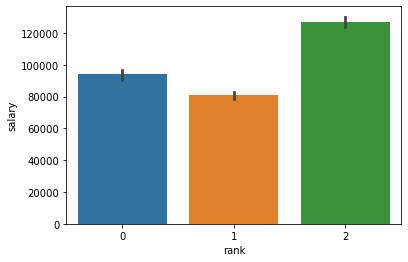

In [10]:
sns.barplot(x='rank',y='salary', data=salary_data)
plt.show()

<AxesSubplot:xlabel='discipline', ylabel='salary'>

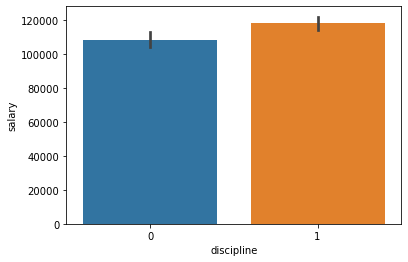

In [11]:
sns.barplot(x='discipline',y='salary',data=salary_data)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

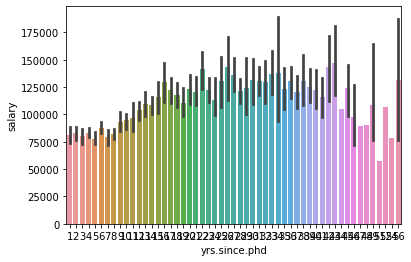

In [12]:
sns.barplot(x='yrs.since.phd',y='salary',data=salary_data)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

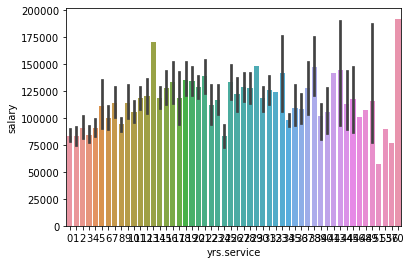

In [13]:
sns.barplot(x='yrs.service',y='salary',data=salary_data)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

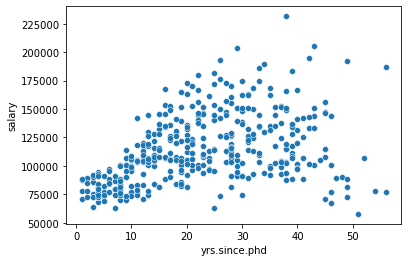

In [14]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=salary_data)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

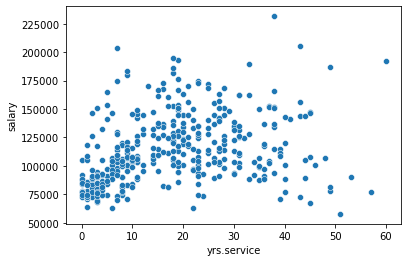

In [15]:
sns.scatterplot(x='yrs.service',y='salary',data=salary_data)

<AxesSubplot:>

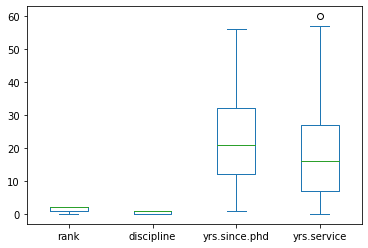

In [16]:
x=salary_data.drop('salary',axis=1)
x.plot(kind='box',figsize=(6,4))

In [17]:
# checking skewness
y=salary_data['salary']
x.skew().sort_values()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
dtype: float64

In [18]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
pd.DataFrame(x_new).skew()

0   -0.830409
1   -0.177684
2   -0.132757
3   -0.122152
dtype: float64

In [19]:
x_new=power_transform(x_new)
pd.DataFrame(x_new).skew()

0   -0.733335
1   -0.177684
2   -0.010806
3   -0.002998
dtype: float64

In [20]:
x_new=power_transform(x_new)
pd.DataFrame(x_new).skew()

0   -0.726451
1   -0.177684
2    0.002668
3    0.011861
dtype: float64

In [21]:
from scipy import stats
z=np.abs(stats.zscore(x_new))
print(z)

[[0.70171444 0.91540317 0.1701642  0.21082945]
 [0.70171444 0.91540317 0.09272813 0.06225914]
 [1.40343626 0.91540317 1.5688655  1.26290907]
 ...
 [0.70171444 1.09241483 1.44189834 0.68091489]
 [0.70171444 1.09241483 0.28270462 0.01496862]
 [1.40343626 1.09241483 1.12376723 1.11306113]]


In [22]:
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_new)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [25]:
rand=0
rscore=0
lr=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    rs=r2_score(y_test,pred)
    if (rs>rscore):
        rscore=rs
        rand=i

print("Maximum r2 score=\t",rscore,"Best Random State= \t",rand)

Maximum r2 score=	 0.5627805977724765 Best Random State= 	 79


In [26]:
# again splting using best random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=79)

In [27]:
lr.fit(x_train, y_train)
training_score = lr.score(x_train, y_train)
testing_score = lr.score(x_test, y_test)

In [28]:
print(lr.intercept_)
print(lr.coef_)

113639.11302024104
[17047.564074    7991.19237054  5935.30294116 -3294.71773336]


In [29]:
print("Training score=",training_score)
print("Testing Score=",testing_score)

Training score= 0.3947211222972695
Testing Score= 0.5627805977724765


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print ("Mean Absolute Error=",mean_absolute_error(y_test,pred))

Mean Absolute Error= 28452.622089298347
